In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


final_states = pd.read_pickle('/home/jakob/Project_MayaSim/Python/output_data/X9_stability_analysis/results/all_final_states')
print(final_states.index.levels)

Populating the interactive namespace from numpy and matplotlib
[[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], [4000, 6000, 8000, 10000], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], ['final max cluster size', 'final population', 'final trade links', 'final_cleared_cells', 'final_climax_cells', 'final_regrowth_cells']]


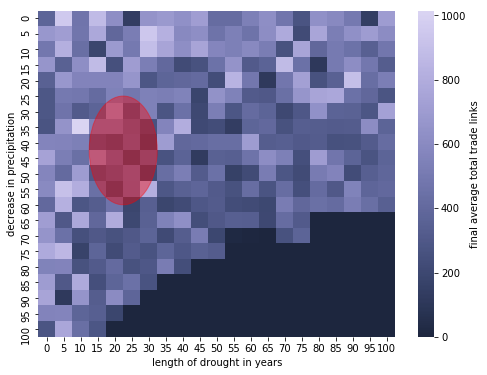

In [2]:
min_data = final_states.groupby(level=[0, 1, 2, 4]).min().unstack('d_length')
min_data.columns = min_data.columns.droplevel()

pylab.rcParams['figure.figsize'] = (8, 6)

fig, ax = plt.subplots()
cmap = sns.cubehelix_palette(start=2.8, rot=.1, reverse=True, as_cmap=True)
sns.heatmap(min_data.xs(level=['r_trade', 'observables'], key=[8000, 'final trade links']).astype('int'), 
            fmt="d", 
            ax=ax,
            cmap=cmap,
            cbar_kws={'label': 'final average total trade links'}
           )
ax.set_ylabel('decrease in precipitation')
ax.set_xlabel('length of drought in years')

ellipse = mpl.patches.Ellipse(xy = (5, 9), width=4, height=7, color='r', alpha=0.4)
ax.add_artist(ellipse)

fig.savefig('stability_analysis_plot_trade_links.pdf', transparent=True)

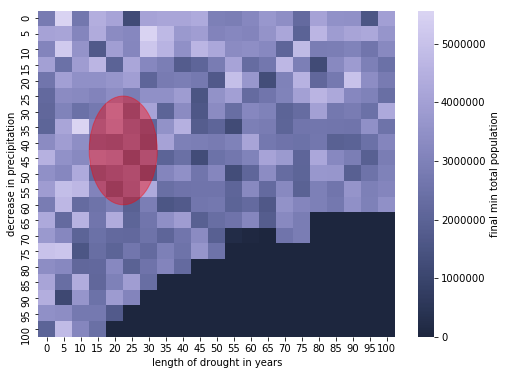

In [3]:
min_data = final_states.groupby(level=[0, 1, 2, 4]).min().unstack('d_length')
min_data.columns = min_data.columns.droplevel()
min_data.head()

pylab.rcParams['figure.figsize'] = (8, 6)

fig, ax = plt.subplots()
cmap = sns.cubehelix_palette(start=2.8, rot=.1, reverse=True, as_cmap=True)
sns.heatmap(min_data.xs(level=['r_trade', 'observables'], key=[8000, 'final population']).astype('int'), 
            fmt="d", 
            ax=ax,
            cmap=cmap,
            cbar_kws={'label': 'final min total population'}
           )
ax.set_ylabel('decrease in precipitation')
ax.set_xlabel('length of drought in years')

ellipse = mpl.patches.Ellipse(xy = (5, 9), width=4, height=7, color='r', alpha=0.4)
ax.add_artist(ellipse)

fig.savefig('stability_analysis_plot_population.pdf', transparent=True)

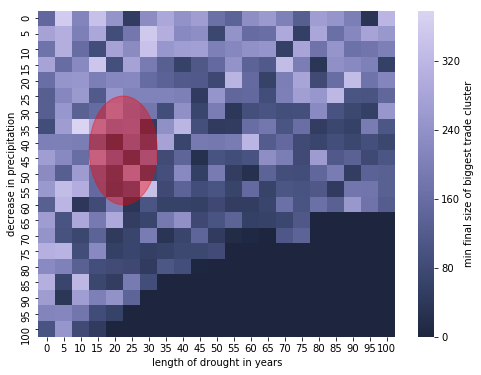

In [4]:
min_data = final_states.groupby(level=[0, 1, 2, 4]).min().unstack('d_length')
min_data.columns = min_data.columns.droplevel()
min_data.head()

pylab.rcParams['figure.figsize'] = (8, 6)

fig, ax = plt.subplots()
cmap = sns.cubehelix_palette(start=2.8, rot=.1, reverse=True, as_cmap=True)
sns.heatmap(min_data.xs(level=['r_trade', 'observables'], key=[8000, 'final max cluster size']).astype('int'), 
            fmt="d", 
            ax=ax,
            cmap=cmap,
            cbar_kws={'label': 'min final size of biggest trade cluster'}
           )
ax.set_ylabel('decrease in precipitation')
ax.set_xlabel('length of drought in years')

ellipse = mpl.patches.Ellipse(xy = (5, 9), width=4, height=7, color='r', alpha=0.4)
ax.add_artist(ellipse)

fig.savefig('stability_analysis_plot_clusters.pdf', transparent=True)

Caption: Average population after recovery period resulting from a drought event of given length and decrease in precipitation.

[18738, 50218.5, 81699]
[0, 189.0, 378]
[0, 2781382.5, 5562765]


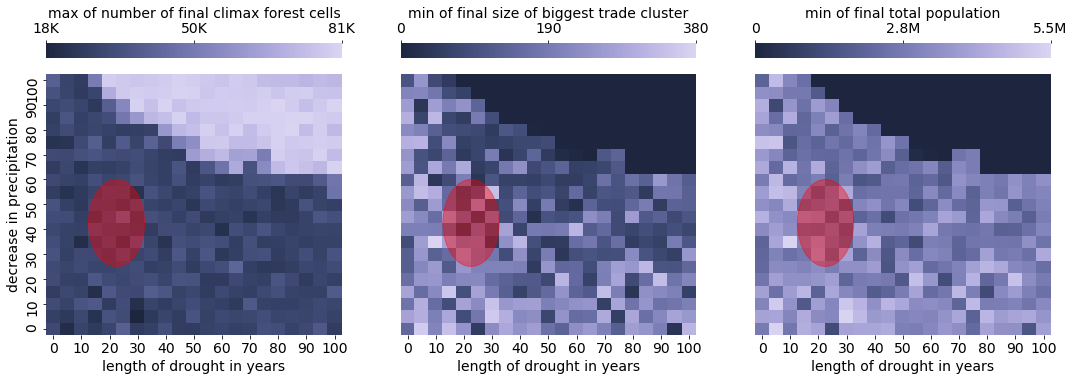

In [5]:
pylab.rcParams['figure.figsize'] = (18, 6)
mpl.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(nrows=1, ncols=3)

def plt_heatmap(ax, clabel, obs, measure, ylabels, tlabels, min_data):
    
    if measure == 'max':
        min_data = final_states.groupby(level=[0, 1, 2, 4]).max().unstack('d_length')
    elif measure == 'min':
        min_data = final_states.groupby(level=[0, 1, 2, 4]).min().unstack('d_length')
    elif measure == 'mean':
        min_data = final_states.groupby(level=[0, 1, 2, 4]).min().unstack('d_length')
    else:
        raise ValueError(f'measure {measure} is not implemented')
    min_data.columns = min_data.columns.droplevel()

    cmap = sns.cubehelix_palette(start=2.8, rot=.1, reverse=True, as_cmap=True)
    
    mi = min_data.xs(level=['r_trade', 'observables'], key=[8000, obs]).astype('int').min().min()
    ma = min_data.xs(level=['r_trade', 'observables'], key=[8000, obs]).astype('int').max().max()
    
    cax = sns.heatmap(min_data.xs(level=['r_trade', 'observables'], key=[8000, obs]).astype('int'), 
                fmt="d", 
                ax=ax,
                cmap=cmap,
                #cbar=False,
                cbar_kws=dict(label=clabel,use_gridspec=False, location='top')
               )
    cax.collections[0].colorbar.set_ticks([mi, (mi+ma)/2., ma])
    cax.collections[0].colorbar.set_ticklabels(tlabels)
    print([mi, (mi+ma)/2., ma])
    
    ax.invert_yaxis()
    
    
    ax.set_xlabel('length of drought in years')
    if not ylabels:
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.yaxis.set_tick_params(size=0)
        ax.set_ylabel('')
    else:
        ax.set_ylabel('decrease in precipitation')
        
    ellipse = mpl.patches.Ellipse(xy = (5, 9), width=4, height=7, color='r', alpha=0.4)
    ax.add_artist(ellipse)
    

clabels = ('max of number of final climax forest cells',
           'min of final size of biggest trade cluster',
           'min of final total population'
          )
measure = ('max',
           'min',
           'min')
ylabels = (True,
           False,
           False)
observables = ('final_climax_cells',
               'final max cluster size',
               'final population'
              )
tick_labels = (['18K', '50K', '81K'],
               ['0', '190', '380'],
               ['0', '2.8M', '5.5M']
              )
               
for pars in zip(ax, clabels, observables, measure, ylabels, tick_labels):
    plt_heatmap(*pars, min_data)

#ax.xaxis.tick_top()
#fig.tight_layout()
fig.savefig('stability_analysis_plot.pdf', transparent=True)

In [6]:
dir(fig.get_axes()[-1])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_axes',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_cursorProps',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_legend_handles',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_init_axis',
 '_label',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_navigate',
 '_navigate_m

In [7]:
for key in trj_data.keys():
    print(trj_data[key].columns)

NameError: name 'trj_data' is not defined

In [ ]:
trj.plot()